<a href="https://colab.research.google.com/github/baldeoJV/pawScan_model/blob/main/DogBreedClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jessicali9530_stanford_dogs_dataset_path = kagglehub.dataset_download('jessicali9530/stanford-dogs-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPool2D, RandomHeight, RandomWidth, RandomZoom, RandomRotation, RandomFlip
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating a dataset class object for the data

In [3]:
import os

class_names = sorted(os.listdir("/kaggle/input/stanford-dogs-dataset/images/Images"))

In [4]:
DIR = "/kaggle/input/stanford-dogs-dataset/images/Images"
BATCH_SIZE = 32
IMG_SHAPE = (224, 224)
train_data, test_data = image_dataset_from_directory(DIR,
                                                     batch_size = BATCH_SIZE,
                                                     image_size = IMG_SHAPE,
                                                     label_mode = 'categorical',
                                                     validation_split = 0.2,
                                                     subset = 'both', seed = 42)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Using 4116 files for validation.


In [5]:
class_names = train_data.class_names

In [6]:
def display_random_image(train_data, class_names):
    for images, labels in train_data.take(1):
        # Select the first image from the batch
        image = images[0].numpy()
        print(class_names[tf.argmax(labels[0])])
        # Display the image using Matplotlib
        plt.imshow(image.astype("uint8"))  # Assuming the image is in uint8 format
        plt.title(f"Class: {labels[0].numpy()}")
        plt.show()

n02091831-Saluki


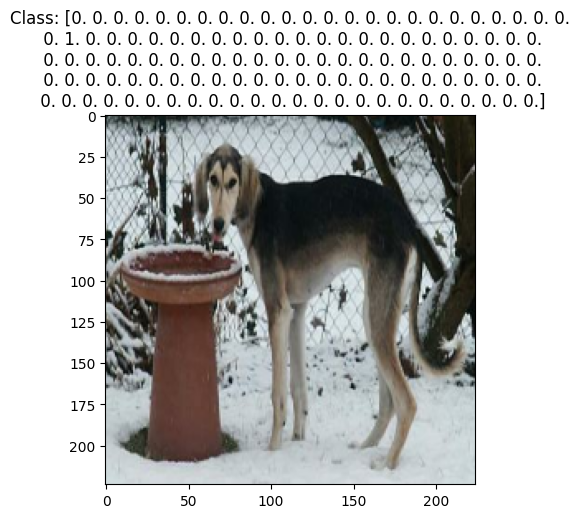

In [7]:
display_random_image(train_data, class_names)

# Creating the baseline model

In [8]:
inputs = tf.keras.layers.Input(shape = IMG_SHAPE + (3, ))
x = Conv2D(256, 5, activation = 'relu')(inputs)
x = Conv2D(256, 5, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Conv2D(128, 5, activation = 'relu')(x)
x = Conv2D(128, 5, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Conv2D(64, 5, activation = 'relu')(x)
x = Conv2D(64, 5, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Flatten()(x)
outputs = Dense(120, activation = 'softmax')(x)

model1 = Model(inputs, outputs)

In [9]:
model1.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(0.01),
               metrics = ['accuracy'])

In [10]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 220, 220, 256)  │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 216, 216, 256)  │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 108, 108, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 104, 104, 128)  │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 128)  │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 42, 42, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     3,387,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,581,496 (25.11 MB)

 Trainable params: 6,581,496 (25.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history1 = model1.fit(train_data, epochs = 5, validation_data = test_data, validation_steps = (0.5*len(test_data)))

Epoch 1/5
  7/515 ━━━━━━━━━━━━━━━━━━━━ 42:44:41 303s/step - accuracy: 0.0094 - loss: 22457346.0000

In [ ]:
def plot_history_graph(history_feature_extraction):
  accuracy = history_feature_extraction.history['accuracy']
  val_accuracy = history_feature_extraction.history['val_accuracy']

  loss = history_feature_extraction.history['loss']
  val_loss = history_feature_extraction.history['val_loss']

  epoch = history_feature_extraction.epoch

  figure = plt.figure(figsize = (10, 5))
  plt.plot(epoch, accuracy, label = 'training accuracy')
  plt.plot(epoch, val_accuracy, label = 'testing accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.title("accuracy graph")
  plt.legend()

  figure2 = plt.figure(figsize = (10, 5))
  plt.plot(epoch, loss, label = 'training loss')
  plt.plot(epoch, val_loss, label = 'testing  loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title("loss curve")
  plt.legend()

  plt.show()

In [ ]:
plot_history_graph(history1)

* The loss isn't going down and the accuracy is not improving either, we'll create a new model with data aug and scaling

# Model 2 - Reduce Conv kernel size, introduce data augmentation and global average pooling

**Note** : For some reason the gpu was taking too long to augment the data so we are going to use the image data generator to augment our data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 0.2, width_shift_range = 0.2, height_shift_range = 0.2, zoom_range = 0.2, horizontal_flip = True,
                            validation_split = 0.2)
train_data_aug = datagen.flow_from_directory(DIR, target_size = IMG_SHAPE, batch_size = BATCH_SIZE, class_mode = 'categorical', subset = 'training')
test_data_aug = datagen.flow_from_directory(DIR, target_size = IMG_SHAPE, batch_size = BATCH_SIZE, class_mode = 'categorical', subset = 'validation')



In [ ]:
inputs = tf.keras.layers.Input(shape = IMG_SHAPE + (3, ))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = Conv2D(256, 3, activation = 'relu')(x)
x = Conv2D(256, 3, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, activation = 'relu')(x)
x = Conv2D(128, 3, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Conv2D(64, 3, activation = 'relu')(x)
x = Conv2D(64, 3, activation = 'relu')(x)
x = MaxPool2D()(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(120, activation = 'softmax')(x)

model2 = Model(inputs, outputs)

In [ ]:
model2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
model2.summary()

In [ ]:
history2 = model2.fit(train_data_aug, epochs = 5, validation_data = test_data_aug, validation_steps = (0.5 * len(test_data_aug)))

In [ ]:
plot_history_graph(history2)

* Model 2 is not performing any better, next try increase the number of layers and decrease per layer convolutions

# Model3 - Increase number of convolution layers, decrease pooling layers

In [ ]:
inputs = tf.keras.layers.Input(shape = IMG_SHAPE + (3, ))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = Conv2D(64, 3, activation = 'relu')(x)
x = Conv2D(64, 3, activation = 'relu')(x)
x = Conv2D(64, 3, activation = 'relu')(x)
x = Conv2D(64, 3, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Conv2D(32, 3, activation = 'relu')(x)
x = Conv2D(32, 3, activation = 'relu')(x)
x = Conv2D(32, 3, activation = 'relu')(x)
x = Conv2D(32, 3, activation = 'relu')(x)
x = MaxPool2D()(x)
x = Conv2D(16, 3, activation = 'relu')(x)
x = Conv2D(16, 3, activation = 'relu')(x)
x = Conv2D(16, 3, activation = 'relu')(x)
x = Conv2D(16, 3, activation = 'relu')(x)
x = Flatten()(x)
outputs = Dense(120, activation = 'softmax')(x)

model3 = Model(inputs, outputs)

In [ ]:
model3.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model3.summary()

In [ ]:
history3 = model3.fit(train_data_aug, epochs = 5, validation_data = test_data_aug, validation_steps = (0.5 * len(test_data_aug)))

In [ ]:
plot_history_graph(history3)

* The model still isn't performing any good, lets try and use transfer learning to drastically increase the accuracy of our model

# Transfer Learning


In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = IMG_SHAPE + (3, ), name = 'InputLayer')

# Base Model Layer
x = base_model(inputs, training = False)

# GAP2D Layer
x = GlobalAveragePooling2D(name = 'GAP2DLayer')(x)

# Output Layer
outputs = Dense(120, activation = 'softmax', name = 'OutputLayer')(x)

# Model creation
model = Model(inputs, outputs)

In [ ]:
model.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])
model.summary()

In [ ]:
initial_epochs = 3

history_feature_extraction = model.fit(train_data_aug,
                                       epochs = initial_epochs,
                                       validation_data = test_data_aug)

In [ ]:
model.evaluate(test_data_aug)

In [ ]:
plot_history_graph(history_feature_extraction)

# Trying to fine tune and see if we can squeeze a bit more accuracy

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
    layer.trainable = False

for x in base_model.layers:
    if x.trainable == True:
        print(x.name, x.trainable)
print('total layers -', len(base_model.layers))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(0.0005), # reducing learning rate to not overfit on current dataset
               metrics = ['accuracy'])
fine_tuning_epochs = initial_epochs + 5

history_fine_tuning = model.fit(train_data_aug,
                                 epochs = fine_tuning_epochs,
                                 initial_epoch = initial_epochs,
                                 validation_data = test_data_aug,
                                 validation_steps = (0.5 * len(test_data_aug)))

In [ ]:
plot_history_graph(history_fine_tuning)

In [ ]:
# final accuracy

model.evaluate(test_data_aug)